# 🌳 **Mathematical Intuition**

## 1. **Entropy**

* **What it measures**:

  * The *uncertainty* or *disorder* in the dataset.
  * High entropy → very mixed (impure).
  * Low entropy → more certain (pure).

* **Formula**:

$$
H(S) = - \sum_{i=1}^{k} p_i \log_2(p_i)
$$

Where:

* $S$ = dataset at a node

* $k$ = number of classes (e.g., Yes/No → 2)

* $p_i$ = proportion of samples in class $i$

* **Intuition**:

  * If all samples belong to one class → $H=0$ (no disorder).
  * If split evenly (50-50) → $H=1$ (max disorder for binary).

**Example** (Play Tennis: 9 Yes, 5 No):

$$
p_{yes} = \tfrac{9}{14}, \quad p_{no} = \tfrac{5}{14}
$$

$$
H = -\Big(\tfrac{9}{14}\log_2\tfrac{9}{14} + \tfrac{5}{14}\log_2\tfrac{5}{14}\Big) \approx 0.94
$$

---

## 2. **Information Gain (IG)**

* **What it measures**:

  * The *reduction in uncertainty* after splitting on a feature.
  * Higher IG → better feature to split on.

* **Formula**:

$$
IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)
$$

Where:

* $S$ = parent dataset

* $A$ = feature

* $S_v$ = subset of $S$ where feature $A=v$

* $\frac{|S_v|}{|S|}$ = weighted fraction of samples

* **Intuition**:

  * Start with uncertainty $H(S)$.
  * Split data on feature $A$.
  * Weighted average of children’s entropy = remaining uncertainty.
  * Subtract → gives **how much uncertainty is reduced**.

**Example**:
If root entropy = 0.94 and after splitting on “Outlook” the weighted child entropies = 0.69 →

$$
IG = 0.94 - 0.69 = 0.25
$$

So “Outlook” reduces disorder by 0.25 bits.

---

## 3. **Gini Impurity**

* **What it measures**:

  * Probability that a randomly chosen sample would be misclassified if labeled randomly according to class proportions.

* **Formula**:

$$
Gini(S) = 1 - \sum_{i=1}^{k} p_i^2
$$

Where:

* $p_i$ = proportion of samples in class $i$.

* **Intuition**:

  * If all samples are in one class → $Gini = 0$ (pure).
  * If evenly split → $Gini$ is maximum.
  * For binary classification (p, 1-p):

    $$
    Gini = 2p(1-p)
    $$

    This peaks at $p=0.5$.

**Example** (9 Yes, 5 No):

$$
p_{yes}=\tfrac{9}{14}, \quad p_{no}=\tfrac{5}{14}
$$

$$
Gini = 1 - \Big(\tfrac{9}{14}\Big)^2 - \Big(\tfrac{5}{14}\Big)^2 \approx 0.46
$$

---

# ✅ **Quick Comparison**

| Metric               | Formula                                | Range            | Best when                        | Used in |
| -------------------- | -------------------------------------- | ---------------- | -------------------------------- | ------- |
| **Entropy**          | $-\sum p_i \log_2 p_i$                 | 0 → 1 (binary)   | Measures disorder                | ID3     |
| **Information Gain** | $H(S) - \text{weighted child entropy}$ | ≥ 0              | Higher = better split            | ID3     |
| **Gini Impurity**    | $1 - \sum p_i^2$                       | 0 → 0.5 (binary) | Probability of misclassification | CART    |

---

👉 In short:

* **Entropy** = measure of impurity (like disorder).
* **Information Gain** = reduction in entropy after splitting.
* **Gini Impurity** = alternative impurity measure (faster to compute).



### Explaining Information Gain in Decision Trees

In the previous video, we discussed **Gini Impurity**, **Gini Index**, and **Entropy**, which are used to measure the purity of splits in a Decision Tree. Now, we turn our focus to **Information Gain (IG)**, which helps determine the feature that provides the most effective split at each node of the tree.

---

#### What is Information Gain?

Information Gain is a metric that quantifies the improvement in purity (reduction in entropy) achieved after a dataset split. It helps the decision tree decide which feature to split on to maximize the separation of target classes.

The formula for **Information Gain** is:

$
\text{Gain}(S, \text{Feature}) = H(S) - \sum_{v \in \text{Values}} \left( \frac{|S_v|}{|S|} \cdot H(S_v) \right)
$

Where:

- $H(S)$: Entropy of the root node (before the split).
- $H(S_v)$: Entropy of the subset $S_v$ resulting from splitting $S$ on a specific value $v$ of the feature.
- $\frac{|S_v|}{|S|}$: Proportion of samples in $S_v$ relative to $S$.

---

#### Step-by-Step Calculation of Information Gain

1. **Calculate the Root Node Entropy $H(S)$:**
   Use the formula:
   $
   H(S) = -p_+ \cdot \log_2(p_+) - p_- \cdot \log_2(p_-)
   $
   - $p_+$: Proportion of positive samples.
   - $p_-$: Proportion of negative samples.

2. **Split the Dataset Using a Feature:**
   For each potential split (e.g., $F_1$, $F_2$), divide the dataset into categories $C_1, C_2, \dots$ based on the feature's values.

3. **Calculate the Entropy of Each Category $H(S_v)$:**
   Apply the entropy formula to each subset $S_v$.

4. **Compute Weighted Average Entropy After the Split:**
   Multiply the entropy of each subset $H(S_v)$ by the proportion $\frac{|S_v|}{|S|}$ and sum these weighted values.

5. **Calculate Information Gain:**
   Subtract the weighted average entropy after the split from the root node entropy:
   $
   \text{Gain}(S, \text{Feature}) = H(S) - \sum_{v} \frac{|S_v|}{|S|} H(S_v)
   $

---

#### Example

##### Dataset

**Feature $F_1$:**

- Root Node: 9 Yes, 5 No
- Split:
  - $C_1$: 6 Yes, 2 No
  - $C_2$: 3 Yes, 3 No

1. **Root Node Entropy ($H(S)$):**
   $
   H(S) = -\frac{9}{14} \log_2\left(\frac{9}{14}\right) - \frac{5}{14} \log_2\left(\frac{5}{14}\right) \approx 0.94
   $

2. **Entropy of $C_1$:**
   $
   H(C_1) = -\frac{6}{8} \log_2\left(\frac{6}{8}\right) - \frac{2}{8} \log_2\left(\frac{2}{8}\right) \approx 0.81
   $

3. **Entropy of $C_2$:**
   Since $C_2$ is perfectly impure:
   $
   H(C_2) = 1
   $

4. **Weighted Average Entropy After Split:**
   $
   \text{Weighted Entropy} = \frac{8}{14} \cdot 0.81 + \frac{6}{14} \cdot 1 \approx 0.89
   $

5. **Information Gain ($\text{Gain}(S, F_1)$):**
   $
   \text{Gain}(S, F_1) = 0.94 - 0.89 \approx 0.049
   $

---

#### Comparing Splits

Repeat the above steps for $F_2$. If $\text{Gain}(S, F_2) > \text{Gain}(S, F_1)$, then $F_2$ is a better feature for splitting the dataset.

---

### When to Use Entropy vs. Gini Index

We’ll address this in the next video to clarify scenarios for choosing between these metrics. In summary:

- **Entropy**: More precise but computationally intensive.
- **Gini Index**: Faster and often provides similar splits.

---

### Conclusion

Information Gain helps determine the most effective feature for splitting at each node, guiding the Decision Tree to grow in a way that maximizes class separation. In the next video, we’ll dive deeper into **Entropy vs. Gini Impurity** and their use cases.

Here's a refined explanation for the topic:

---

### **Entropy vs. Gini Impurity: When to Use Each?**

Both **entropy** and **Gini impurity** are methods used to measure the purity of a split in a decision tree. Let’s dive deeper into their distinctions and understand when to use each.

---

#### **1. Entropy:**

- **Formula:**  
  $H(S) = - \sum_{i=1}^{n} P(i) \cdot \log_2 P(i)$  
  Where $P(i)$ is the probability of the $i$-th class.

- **Characteristics:**
  - Entropy uses a logarithmic scale ($\log_2$), which adds computational overhead.
  - As the number of output categories increases, the formula expands to include more terms, reflecting the distribution of all categories.
  - It is theoretically grounded in **information theory**, quantifying the amount of "information" gained by a split.

- **When to Use:**
  - **Small Datasets:**  
    - For datasets with fewer records (e.g., ~10,000 or fewer), the computational cost of entropy is manageable, and its detailed representation of uncertainty can be beneficial.
  - **Detailed Splitting:**  
    - Use entropy when it’s crucial to evaluate the uncertainty in splits thoroughly, as it may give more precise thresholds in some scenarios.

---

#### **2. Gini Impurity:**

- **Formula:**  
  $G(S) = 1 - \sum_{i=1}^{n} P(i)^2$

- **Characteristics:**
  - Simpler to compute compared to entropy, as it doesn’t involve logarithms.
  - Measures the probability of misclassification, making it faster in practice for large datasets.
  - Less sensitive to changes in the probabilities compared to entropy.

- **When to Use:**
  - **Large Datasets:**  
    - For datasets with many records, Gini impurity is computationally faster and preferred for training efficiency.
  - **Default Choice:**  
    - Most decision tree implementations (e.g., Scikit-learn’s DecisionTreeClassifier) use Gini impurity by default due to its speed.

---

#### **General Recommendations:**

- **Default Option:** Start with Gini impurity, as it’s computationally less intensive and often performs comparably to entropy.
- **Experimentation:** In specific cases (e.g., highly imbalanced or nuanced datasets), try both metrics to see which performs better for your problem.

---

#### **Key Takeaway:**

- For most practical purposes, especially when using decision tree classifiers, Gini impurity is the go-to choice.
- Use entropy if the dataset is small or if you're analyzing the splits in great detail for research or interpretability.

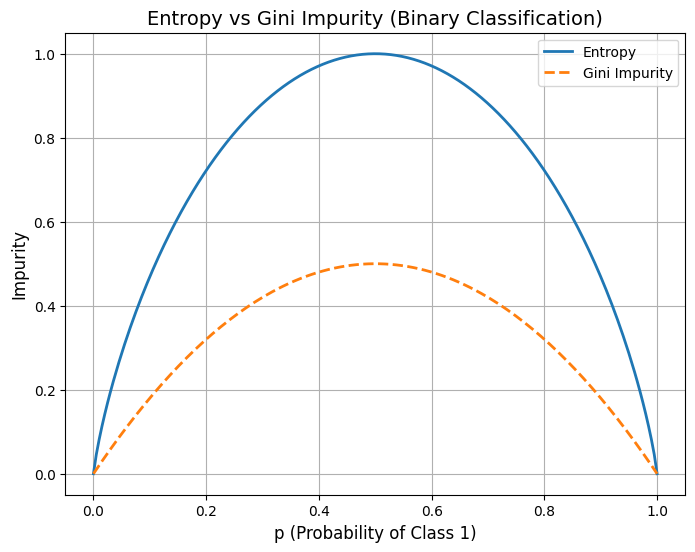

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Probability range
p = np.linspace(0, 1, 200)

# Entropy function (binary classification: [p, 1-p])
entropy = -(p * np.log2(p + 1e-9) + (1 - p) * np.log2(1 - p + 1e-9))

# Gini function
gini = 2 * p * (1 - p)

# Plot
plt.figure(figsize=(8,6))
plt.plot(p, entropy, label="Entropy", linewidth=2)
plt.plot(p, gini, label="Gini Impurity", linewidth=2, linestyle="--")
plt.title("Entropy vs Gini Impurity (Binary Classification)", fontsize=14)
plt.xlabel("p (Probability of Class 1)", fontsize=12)
plt.ylabel("Impurity", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
